# FIAP - Inteligência Artificial - On - 2024

# Atividade Cap 14 - A primeira técnica de aprendizado de máquina

## Professor

## Alunos

- Bruno Henrique Conterato RM561048
- 

In [1]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


## 1. Análise Exploratória de Dados

### 1.1. Carregamento dos dados

In [2]:
# Load dataset

df = pd.read_csv('./data/dataset.csv')

### 1.2. Compreensão dos dados

#### 1.2.1. Visualização em tabela dos dados

In [3]:
print("Quantidade de linhas: ", df.shape[0])
print("Quantidade de colunas: ", df.shape[1])

# Display 5 random samples from the dataset
df.sample(5)

Quantidade de linhas:  2200
Quantidade de colunas:  8


,N,P,K,temperature,humidity,ph,rainfall,label
1506,27,139,205,22.484030,93.408192,5.772180,105.547363,apple
1937,111,41,18,23.643284,78.125867,6.105398,80.961573,cotton
1841,40,5,29,28.484449,97.768655,5.820979,160.389421,coconut
1750,37,52,47,43.080227,93.903057,6.542777,211.852906,papaya
637,20,40,15,29.573295,88.075055,7.199495,45.044671,mungbean


#### 1.2.2. Entendendo os dados

**Variáveis numéricas discretas**
- N: concentração de potássio (unidade não informada)
- P: concentração de fósforo (unidade não informada)
- K: concentração de potássio (unidade não informada)

**Variáveis numéricas contínuas**
- temperature: temperatura (ºC)
- humidity: umidade (%)
- ph: H do solo
- rainfall: quantidade de precipitação (mm)

**Variaveis categóricas**
- label: cultura agrícola


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### 1.2.3. Visualizando as classes (Culturas agrícolas) 

- Culturas agrícolas disponíveis:
  - rice (arroz)
  - maize (milho)
  - chickpea (grão-de-bico)
  - kidneybeans (feijão)
  - pigeonpeas (ervilhas)
  - mothbeans (feijão-moth)
  - mungbean (feijão-mungo)
  - blackgram (feijão-preto)
  - lentil (lentilha)
  - pomegranate (romã)
  - banana (banana)
  - mango (manga)
  - grapes (uvas)
  - watermelon (melancia)
  - muskmelon (melão)
  - apple (maçã)
  - orange (laranja)
  - papaya (papaia)
  - coconut (coco)
  - cotton (algodão)
  - jute (juta)
  - coffee (café)
- Total de culturas agrícolas: 22
- Cada cultura agrícola possui 100 registros
- Total de registros: 2200

In [5]:
# Contagem dos valores para cada classe
classes = df['label'].value_counts()
classes


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

#### 1.2.4. Análise de Outliers

**Investigação de outliers**

- Cada cultura agrícola é cultivada em diferentes condições de solo, temperatura, umidade, pH e precipitação
- Portanto, não faz sentido considerar outliers nos dados entre culturas diferentes
- A análise de outliers deve, portanto, ser feita para cada cultura agrícola individualmente

**Método de detecção de outliers**

Vamos utilizar o método do z_score para detectar outliers.

Cálculo do z_score:

`z = (X - μ) / σ`
- X é o valor da amostra
- μ é a média da população
- σ é o desvio padrão da população

O z_score é uma medida de quantos desvios padrão um ponto de dados está longe da média. Se o z_score de um ponto de dados for maior que 2, consideramos o ponto como um outlier.

Consideremos a população como sendo dados de cada coluna para cada cultura agrícola.

**Outlivers encontrados**
- Apenas 2 pontos outliers encontrados: para a cultura agrícola 'apple' (maçã) na variável 'ph'
  
**Conclusão**
- Os dados não contém quantidade significativa de outliers, sendo assim não foi necessário a correção de inconsistências.

In [6]:
from scipy.stats import zscore

numerical_columns = df.select_dtypes(include=[float, int]).columns
for crop in df['label'].unique():
    print(f"Outliers para a classe {crop}")
    z_scores = df[df['label'] == crop][numerical_columns].apply(zscore)
    outliers = (z_scores.abs() > 2).sum()
    
    if len(outliers[outliers > 0]) == 0:
        print("Nenhum outlier encontrado")
        print("\n")
        continue
    
    print(outliers[outliers > 0])
    print("\n")


Outliers para a classe rice
Nenhum outlier encontrado


Outliers para a classe maize
Nenhum outlier encontrado


Outliers para a classe chickpea
Nenhum outlier encontrado


Outliers para a classe kidneybeans
Nenhum outlier encontrado


Outliers para a classe pigeonpeas
Nenhum outlier encontrado


Outliers para a classe mothbeans
Nenhum outlier encontrado


Outliers para a classe mungbean
Nenhum outlier encontrado


Outliers para a classe blackgram
Nenhum outlier encontrado


Outliers para a classe lentil
Nenhum outlier encontrado


Outliers para a classe pomegranate
Nenhum outlier encontrado


Outliers para a classe banana
Nenhum outlier encontrado


Outliers para a classe mango
Nenhum outlier encontrado


Outliers para a classe grapes
Nenhum outlier encontrado


Outliers para a classe watermelon
Nenhum outlier encontrado


Outliers para a classe muskmelon
Nenhum outlier encontrado


Outliers para a classe apple
ph    2
dtype: int64


Outliers para a classe orange
Nenhum outlier encont

In [7]:
# Filter z-scores for 'apple' crop
apple_z_scores = df[df['label'] == 'apple'][numerical_columns].apply(zscore)

# Find outliers in 'ph' variable
apple_ph_outliers = apple_z_scores[apple_z_scores['ph'].abs() > 2]
# Print the top 10 absolute z-scores for 'apple' crop
top_10_z_scores_indices = apple_z_scores['ph'].abs().sort_values(ascending=False).head(10).index

print("Top 10 absolute z-scores for 'apple' crop with their 'ph' values:")
for idx in top_10_z_scores_indices:
    print(f"Index: {idx}, z_score: {apple_z_scores.loc[idx, 'ph']}, ph value: {df.loc[idx, 'ph']}")

Top 10 absolute z-scores for 'apple' crop with their 'ph' values:
Index: 1508, z_score: 2.128546006234152, ph value: 6.4992268210000015
Index: 1598, z_score: 2.1199792276329554, ph value: 6.496934492
Index: 1537, z_score: 1.919848914297802, ph value: 6.443382913
Index: 1539, z_score: 1.9157618954418458, ph value: 6.442289294
Index: 1558, z_score: 1.7832022651250432, ph value: 6.406818518
Index: 1597, z_score: 1.758920854382436, ph value: 6.400321212000001
Index: 1533, z_score: 1.7054803936806822, ph value: 6.386021424
Index: 1512, z_score: 1.6948625771617147, ph value: 6.3831802710000005
Index: 1570, z_score: 1.630555248753511, ph value: 6.365972687999999
Index: 1573, z_score: -1.5524489277368383, ph value: 5.514253142


#### 1.2.5. Buscando correlações entre as variáveis

- Em termos gerais, as correlações entre as variáveis são baixas (valores absolutos menores que 23.14%)
- A excessão: a correlação entre as variáveis N e K é de 73.62%, considerada elevada.


In [8]:
# Correlation table
corr_df = df.corr(numeric_only=True)
corr_df

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


#### 1.2.6. Estatísticas descritivas básicas das variáveis numéricas

In [9]:
# Summary statistics of the dataset
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### 1.2.7. Análise de valores nulos

Não há valores nulos nos dados

In [10]:
# Contar valores nulos por coluna
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## 2. Análise descritiva

In [11]:
# Set the dark theme for plots
plt.style.use('dark_background')

/tmp/ipykernel_93105/450221353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='N', palette='Set2', legend=False)


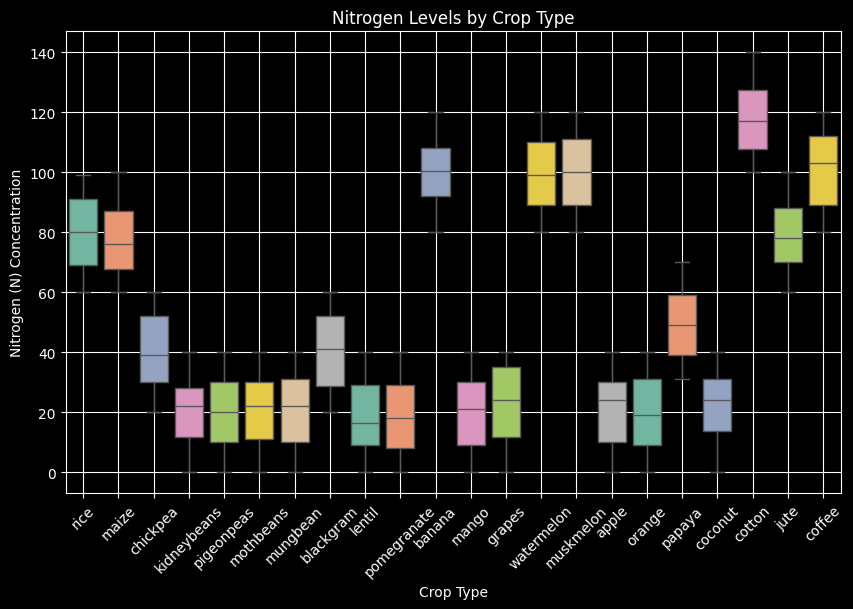

In [12]:
## 1. Nitrogen vs. Crop Type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='N', palette='Set2', legend=False)
plt.title('Nitrogen Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Nitrogen (N) Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

/tmp/ipykernel_93105/673511204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='P', palette='Set2')


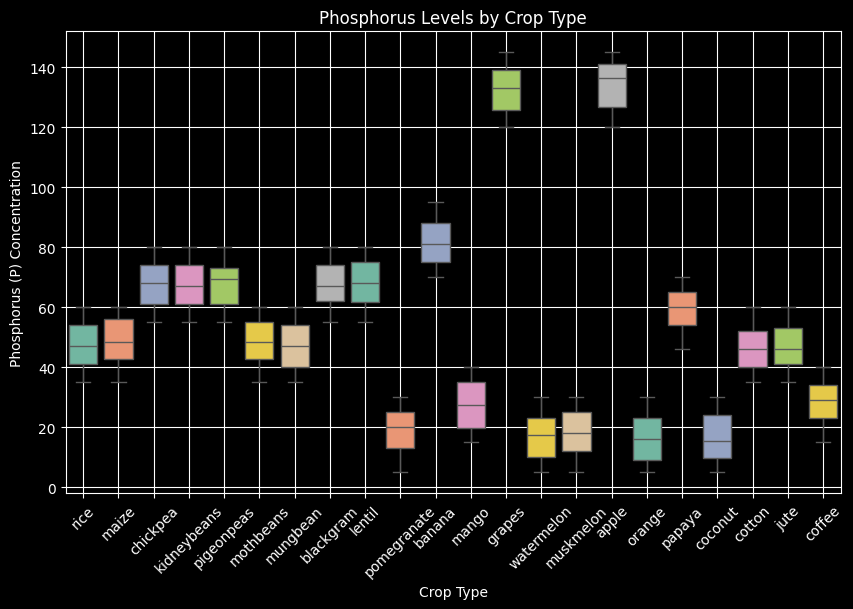

In [13]:
## 2. Phosphorus vs. Crop Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='P', palette='Set2')
plt.title('Phosphorus Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Phosphorus (P) Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

/tmp/ipykernel_93105/3753126277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='K', palette='Set2')


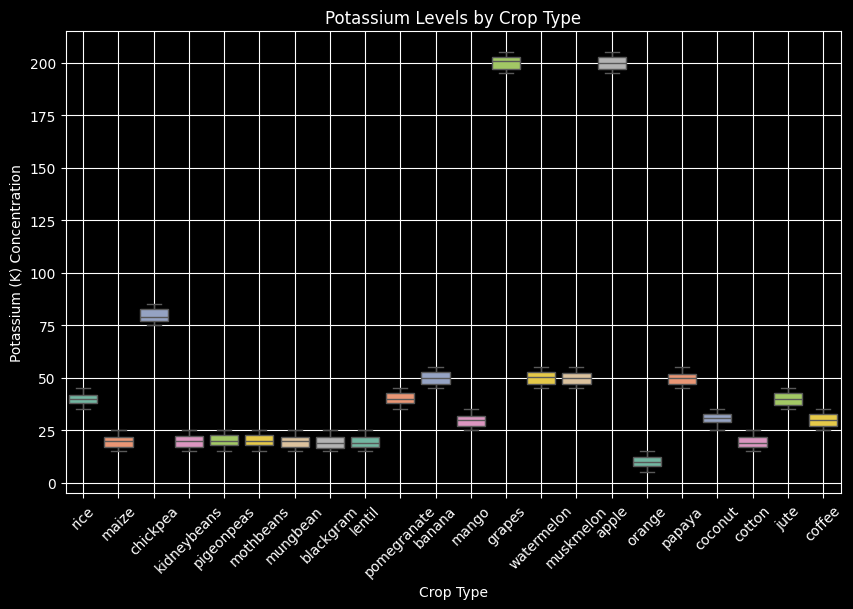

In [14]:
## 3. Potassium vs. Crop Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='K', palette='Set2')
plt.title('Potassium Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Potassium (K) Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

/tmp/ipykernel_93105/3267975502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='temperature', palette='Set2')


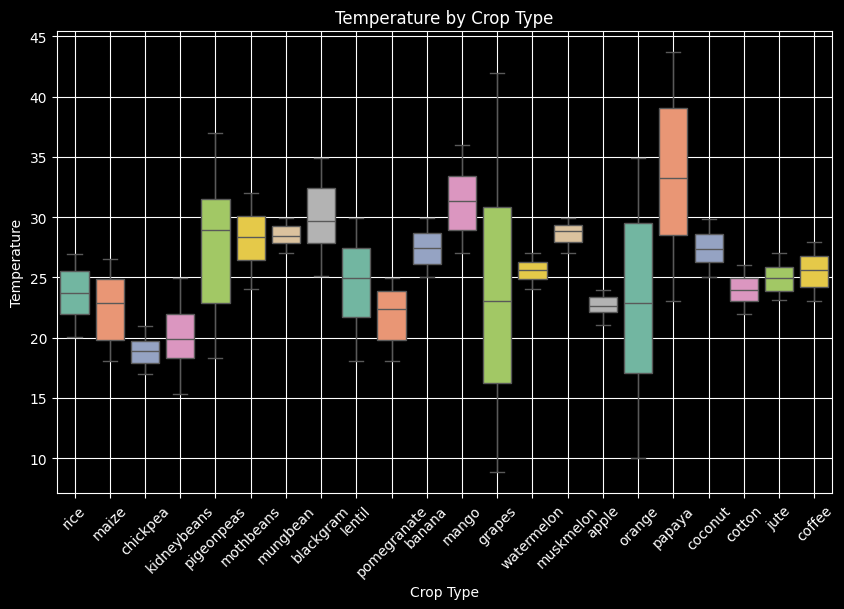

In [15]:
## 4. Temperature vs. Crop Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='temperature', palette='Set2')
plt.title('Temperature by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid()
plt.show()

/tmp/ipykernel_93105/1146560498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='label', y='temperature', palette='Set2')


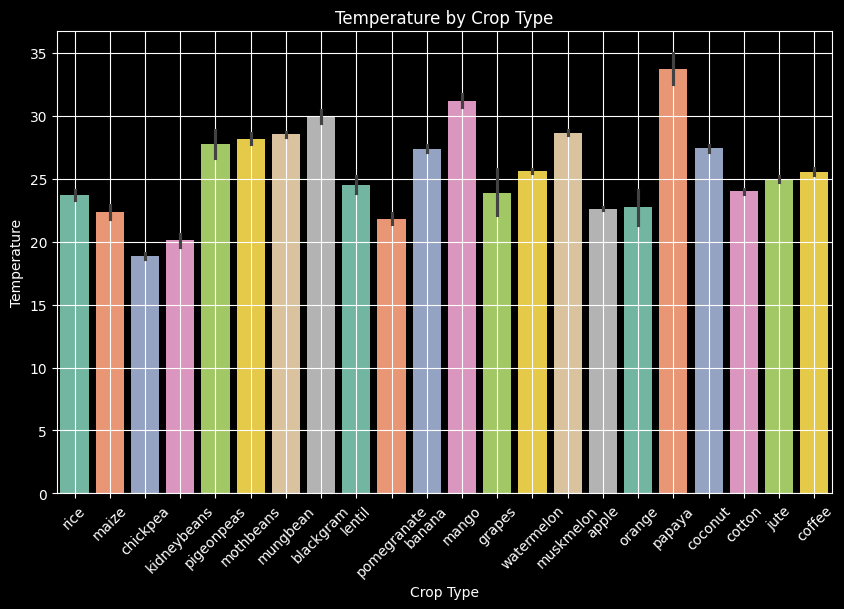

In [16]:
## 4. Temperature vs. Crop Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='label', y='temperature', palette='Set2')
plt.title('Temperature by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid()
plt.show()

/tmp/ipykernel_93105/1807947461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='label', y='humidity', palette='Set2', estimator=sum)


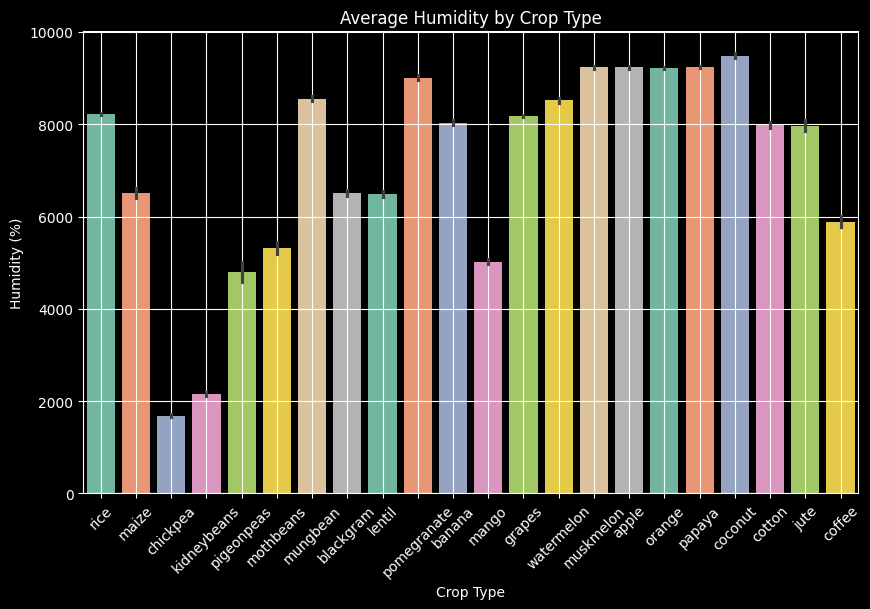

In [17]:
# 5. Humidity vs. Crop Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='label', y='humidity', palette='Set2', estimator=sum)
plt.title('Average Humidity by Crop Type')
plt.xticks(rotation=45)
plt.xlabel('Crop Type')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

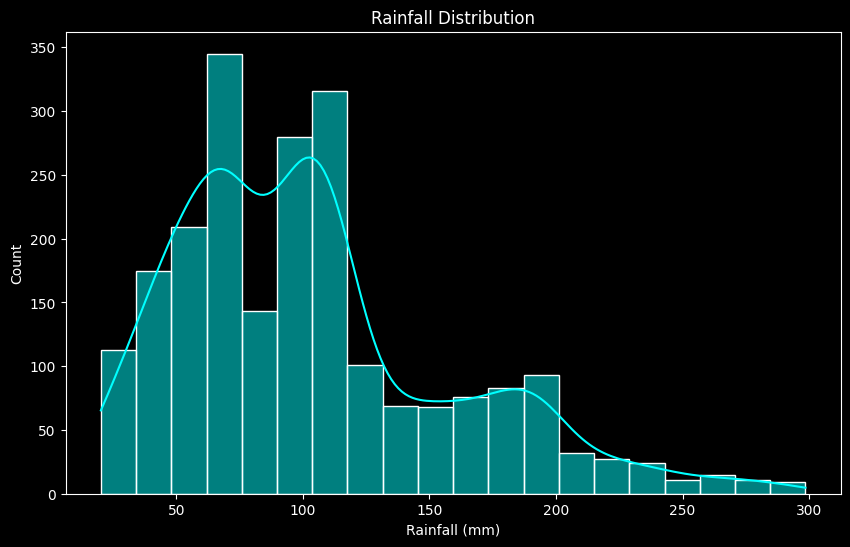

In [18]:
# 6. Rainfall distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rainfall'], bins=20, kde=True, color='cyan')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.show()

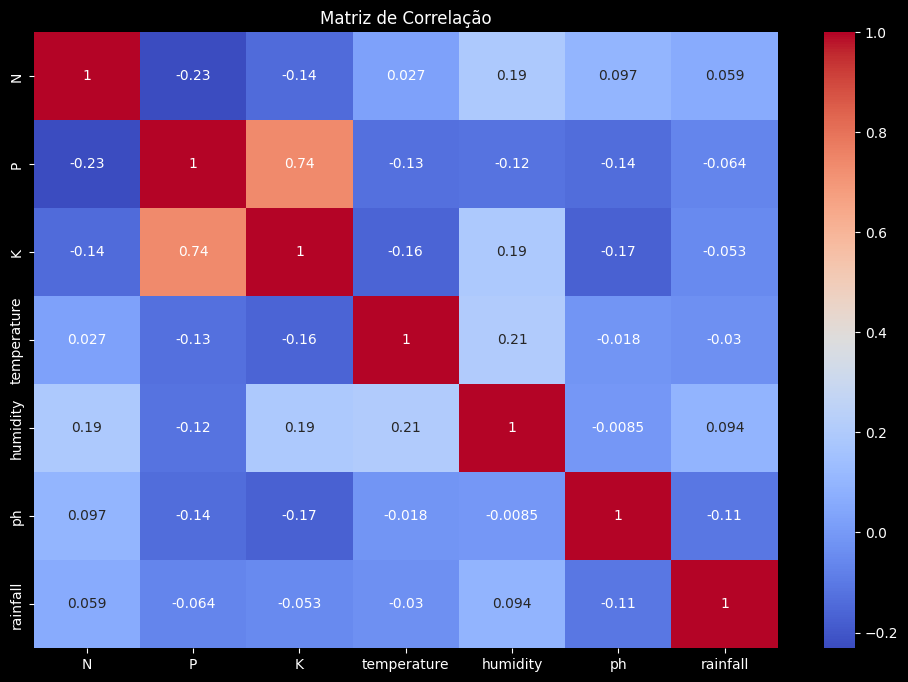

In [19]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

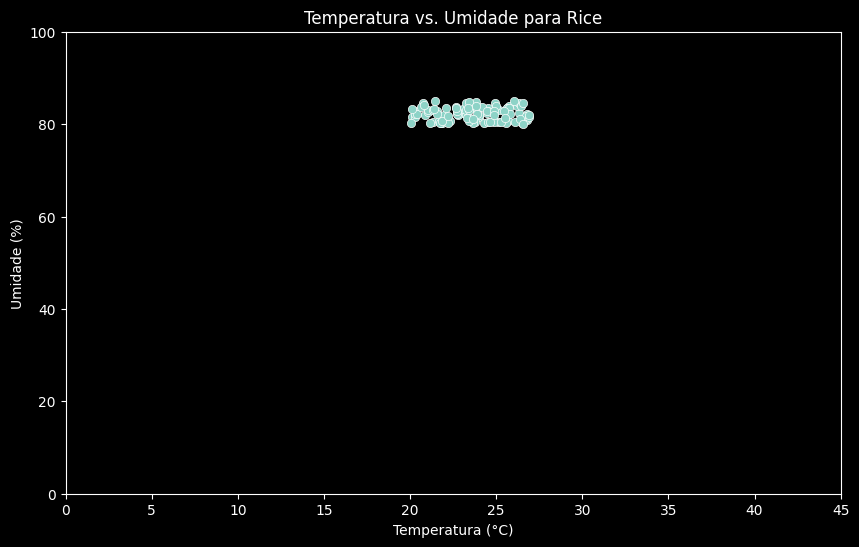

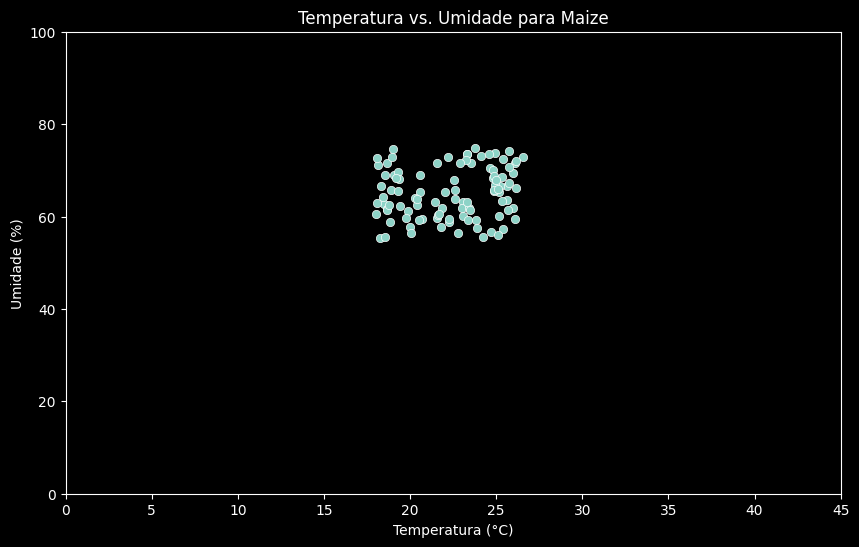

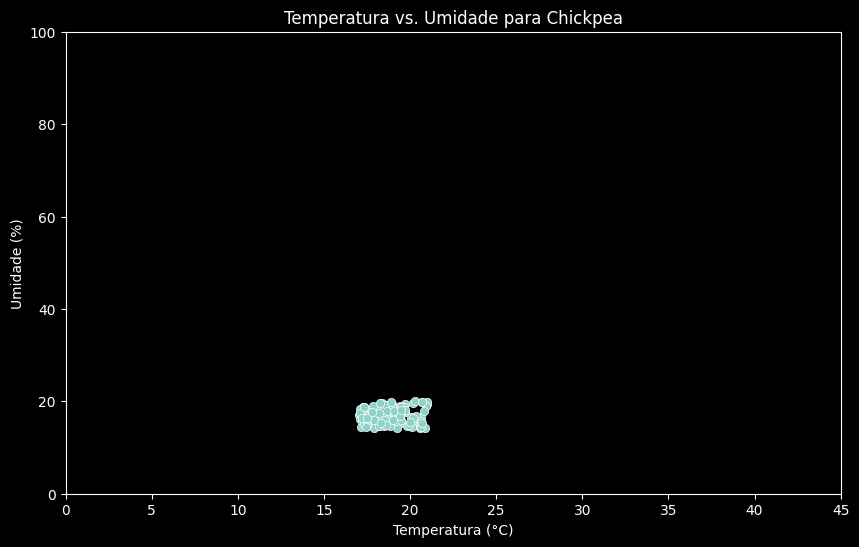

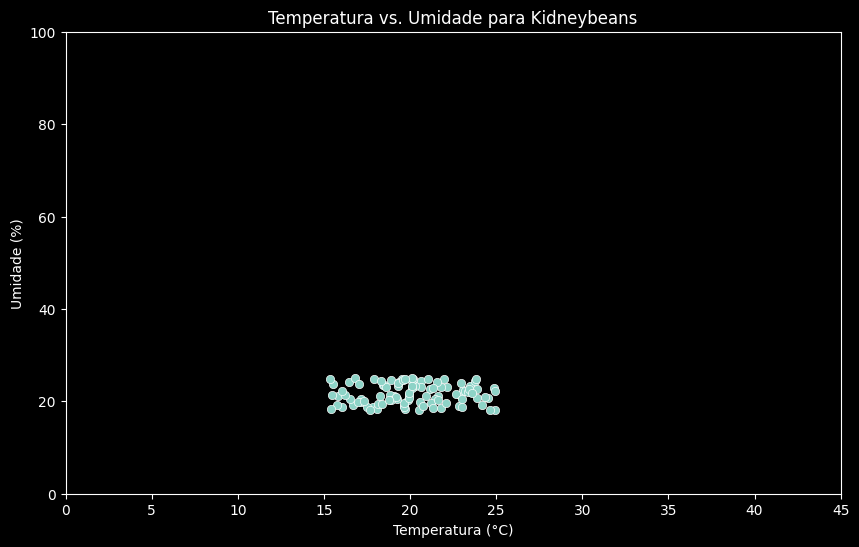

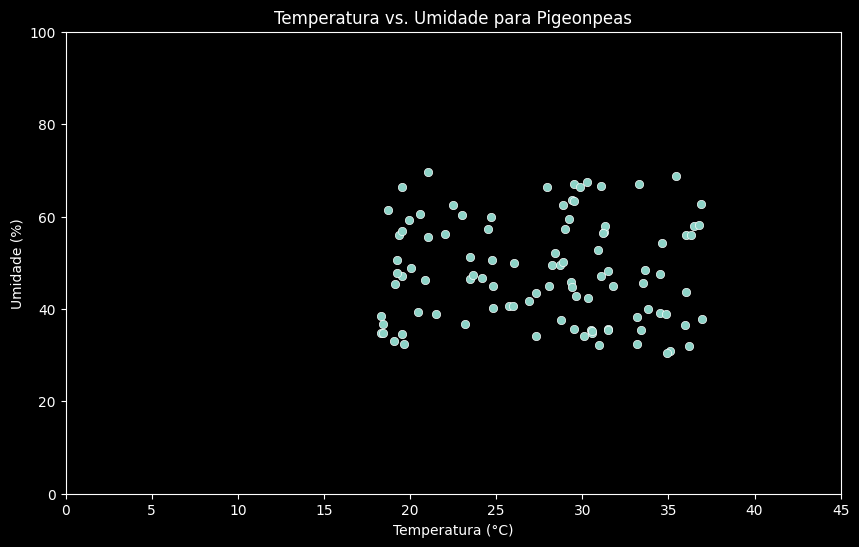

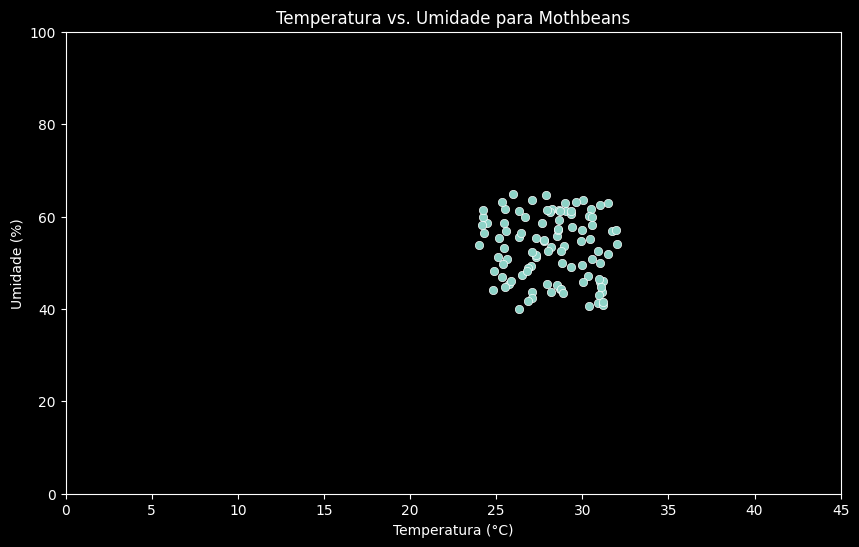

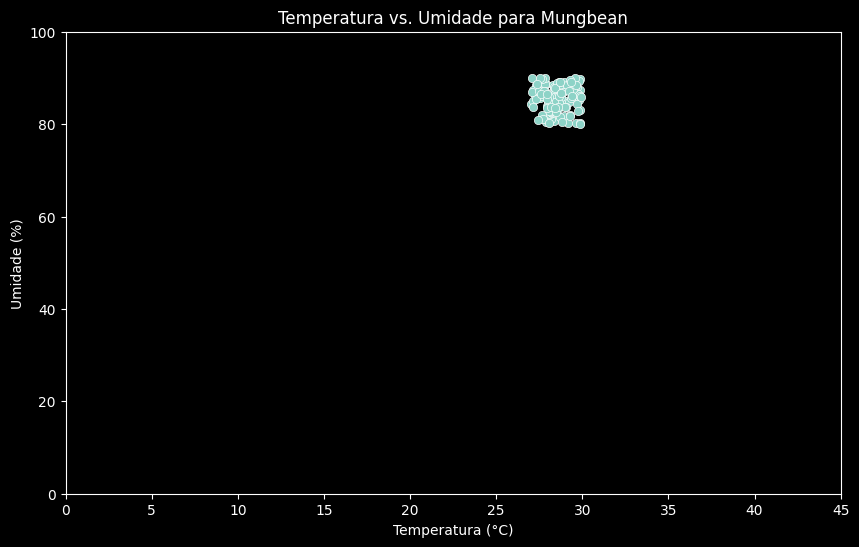

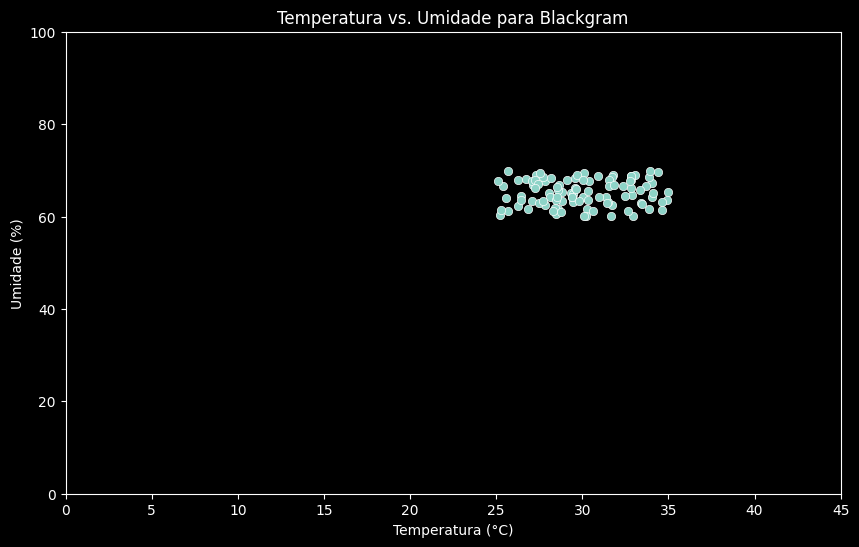

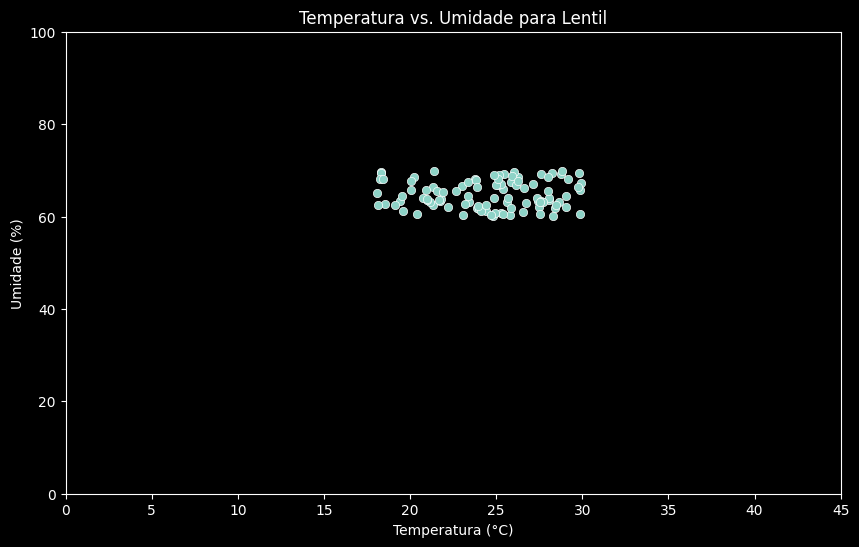

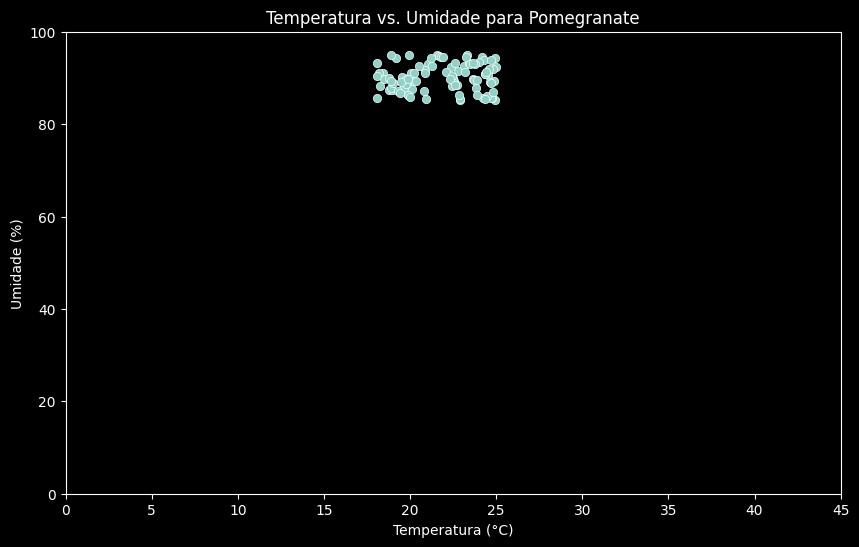

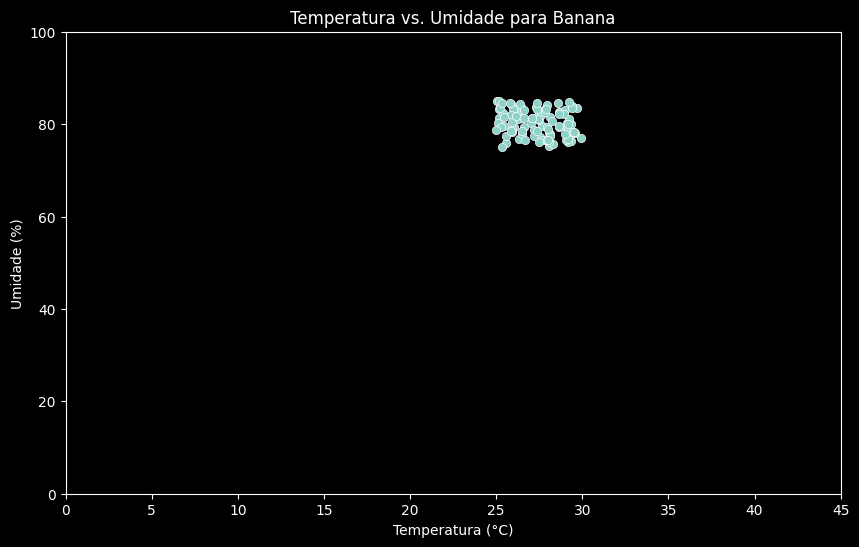

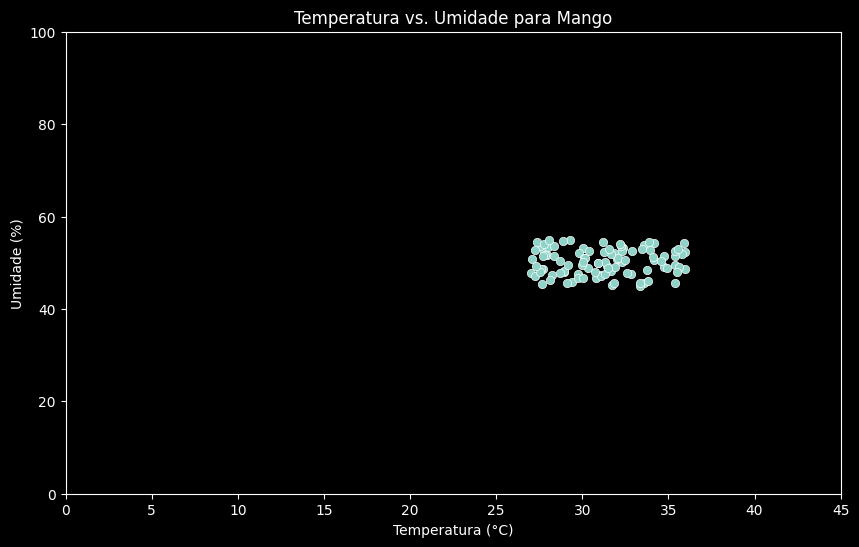

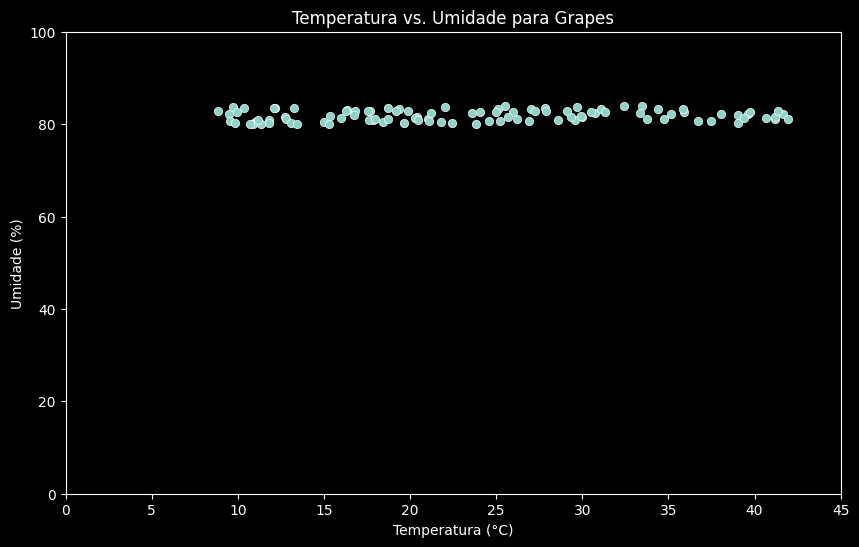

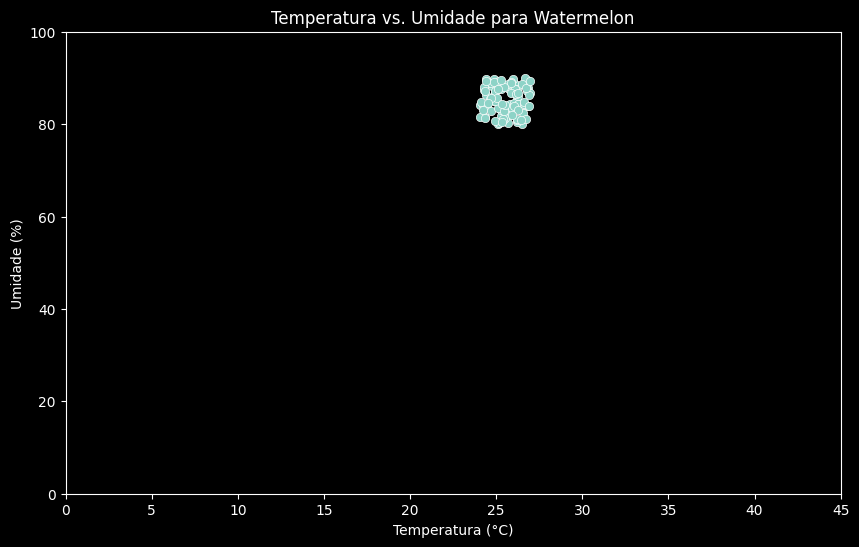

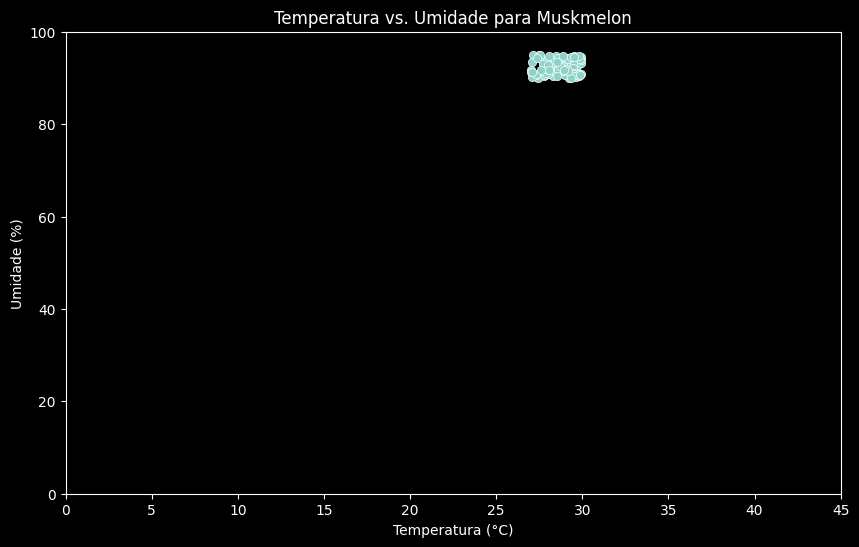

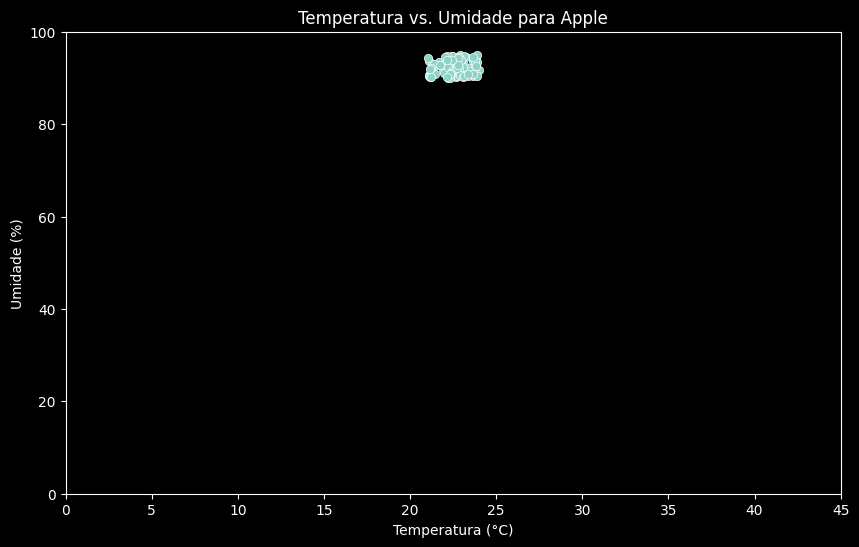

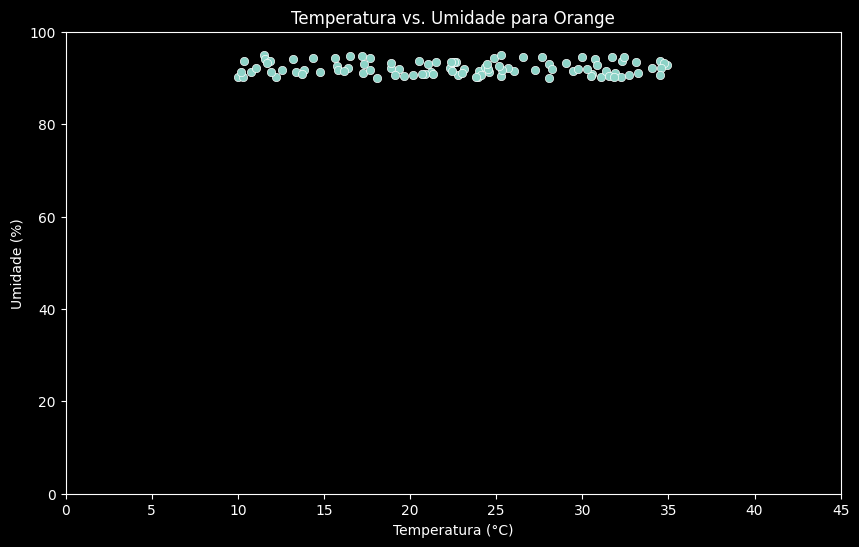

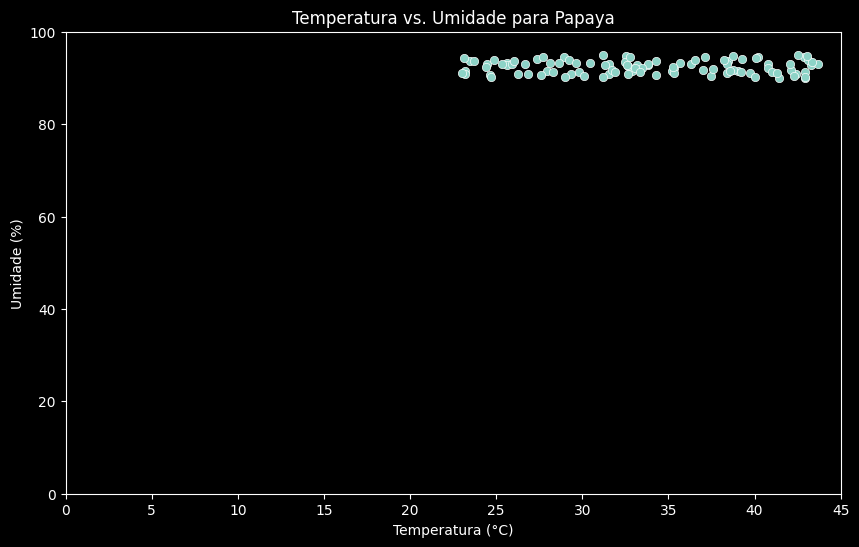

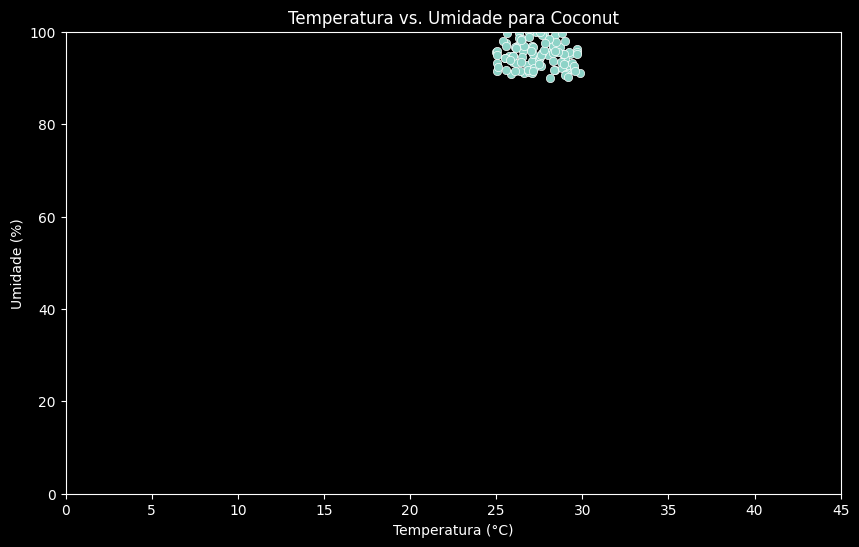

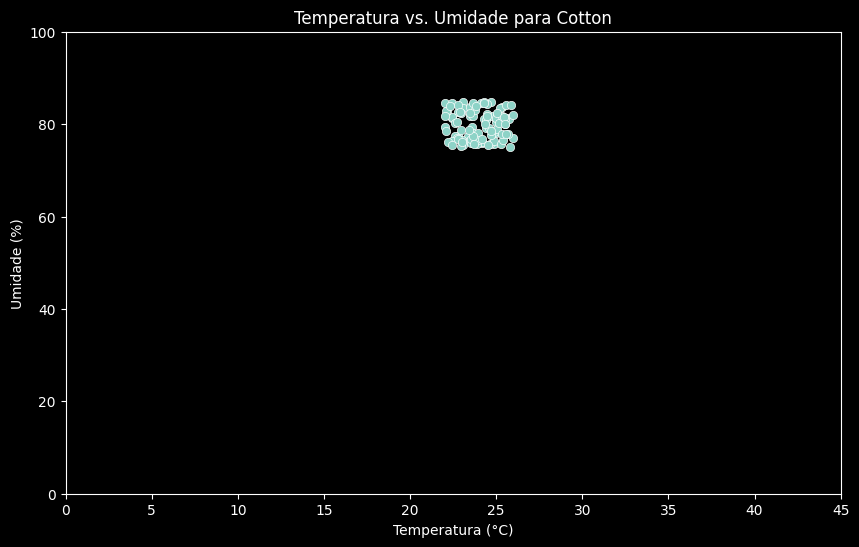

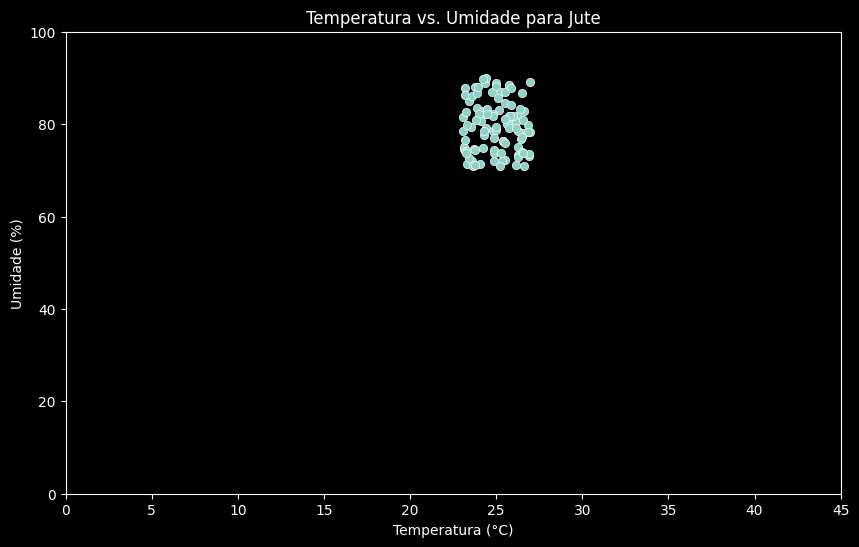

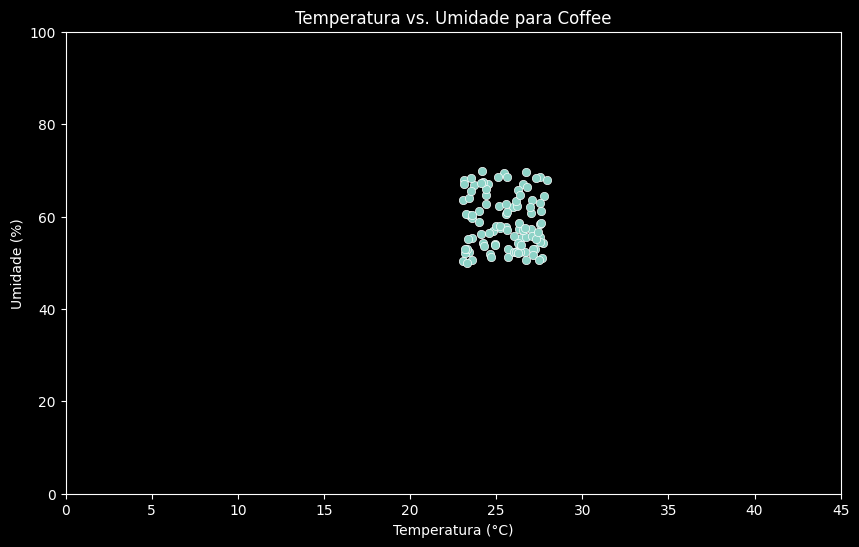

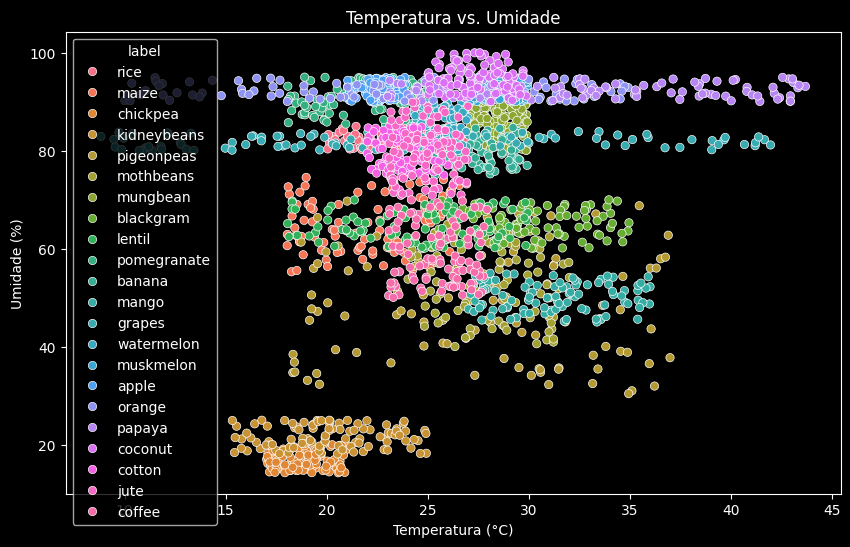

In [20]:
culturas = df['label'].unique()

# Definir limites fixos com base nos dados, adicionando uma margem
temp_min_fixed = 00  # Um pouco abaixo do mínimo
temp_max_fixed = 45  # Um pouco acima do máximo
hum_min_fixed = 0   # Um pouco abaixo do mínimo
hum_max_fixed = 100   # Um pouco acima do máximo

# Loop para criar um gráfico para cada cultura
for cultura in culturas:
    # Filtrar os dados para a cultura atual
    data_cultura = df[df['label'] == cultura]
    
    # Criar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='temperature', y='humidity', data=data_cultura)
    plt.title(f'Temperatura vs. Umidade para {cultura.capitalize()}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Umidade (%)')
    
    # Definir os limites dos eixos
    plt.xlim(temp_min_fixed, temp_max_fixed)
    plt.ylim(hum_min_fixed, hum_max_fixed)
    
    plt.show()

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', hue='label',data=df)
plt.title(f'Temperatura vs. Umidade')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade (%)')
plt.show()

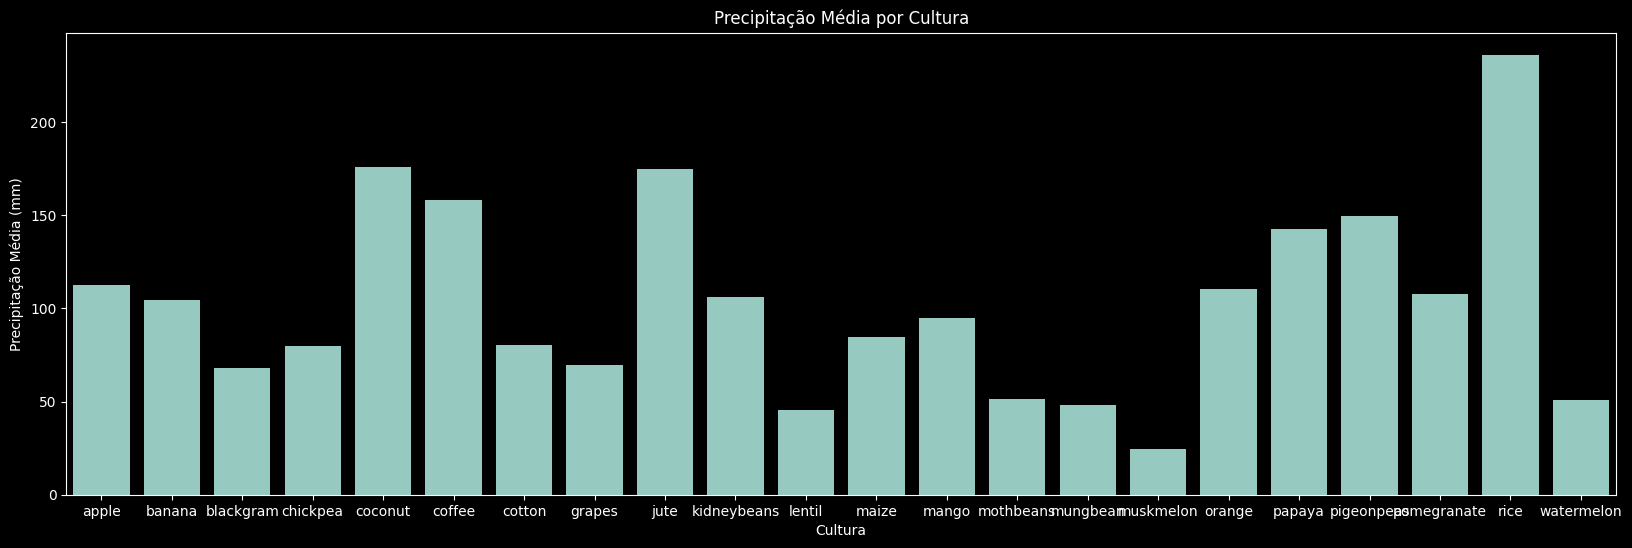

In [21]:
plt.figure(figsize=(20, 6))
avg_rainfall = df.groupby('label')['rainfall'].mean().reset_index()
sns.barplot(x='label', y='rainfall', data=avg_rainfall)
plt.title('Precipitação Média por Cultura')
plt.xlabel('Cultura')
plt.ylabel('Precipitação Média (mm)')
plt.show()

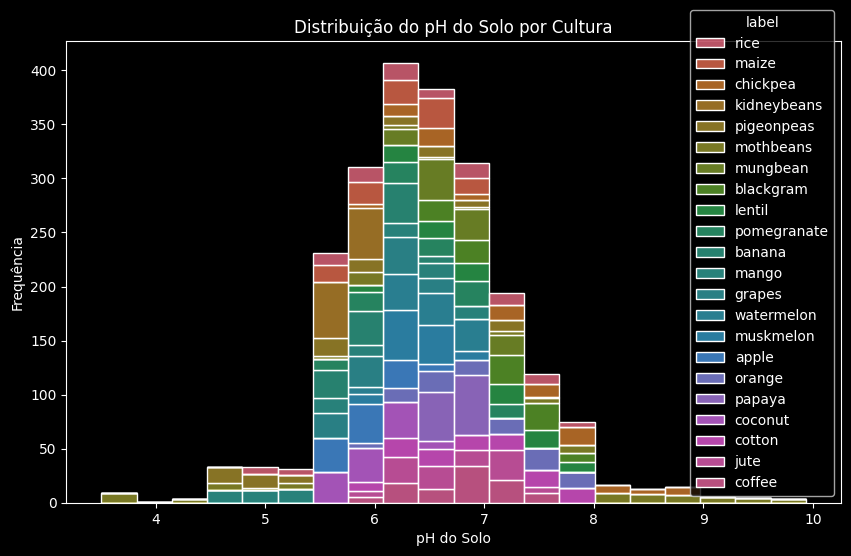

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ph', hue='label', multiple='stack', bins=20)
plt.title('Distribuição do pH do Solo por Cultura')
plt.xlabel('pH do Solo')
plt.ylabel('Frequência')
plt.show()

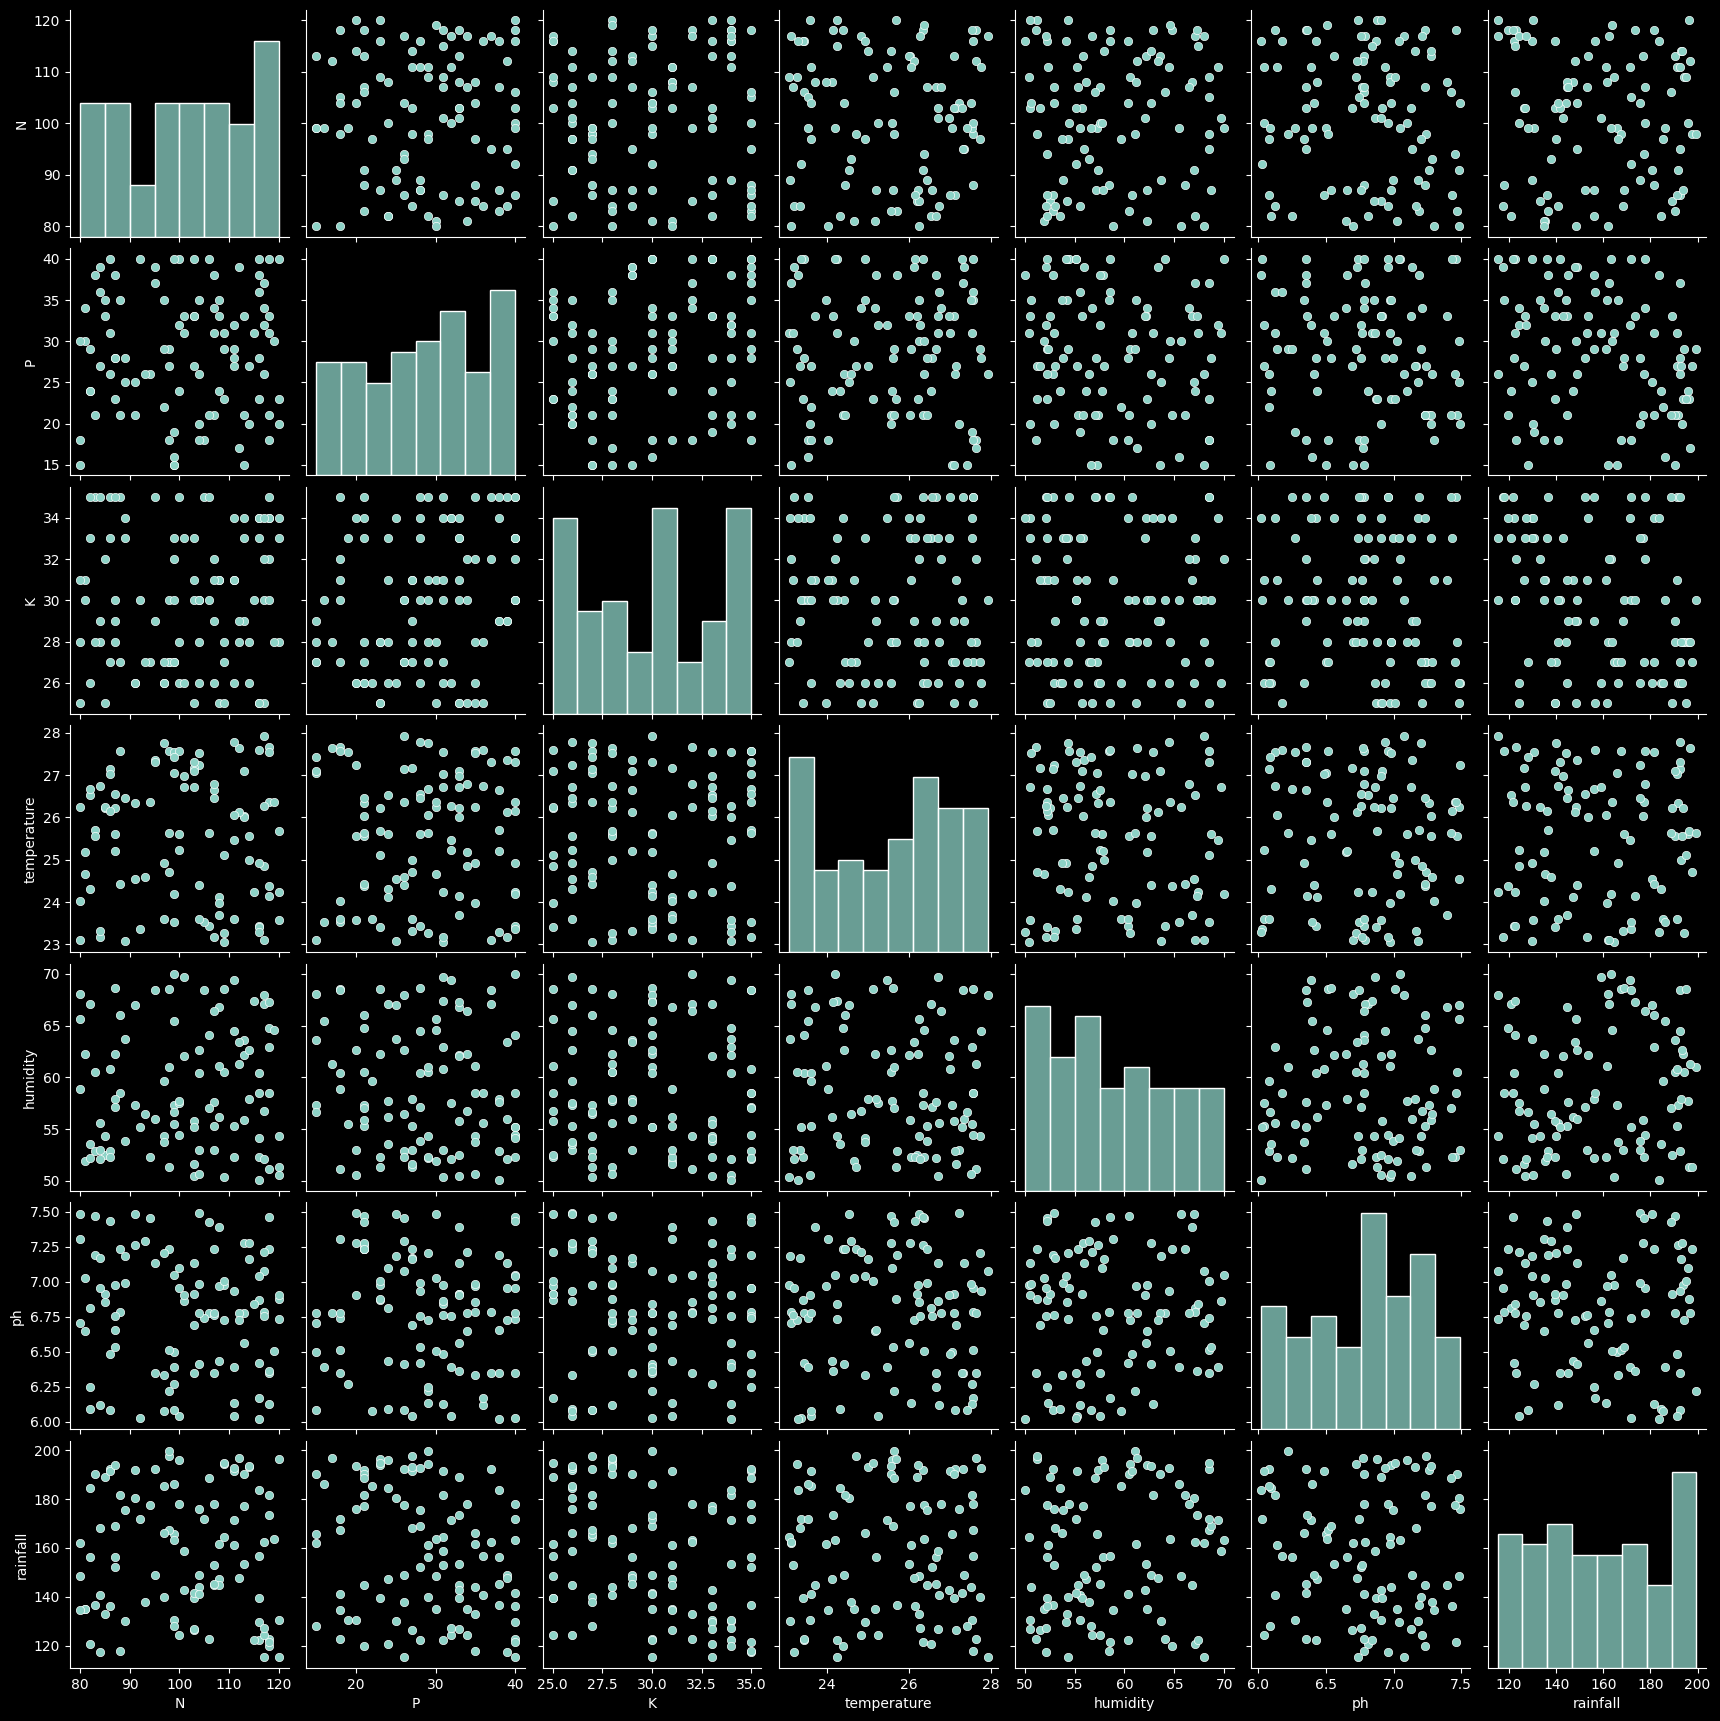

In [23]:
# Correlações bi-variadas para uma cultura específica
_ = sns.pairplot(df[df["label"] == "coffee"])

/tmp/ipykernel_93105/3194351269.py:17: UserWarning: Mismatched number of handles and labels: len(handles) = 9 len(labels) = 22
  legend = ax.legend(handles=scatter.legend_elements()[0], labels=labels)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

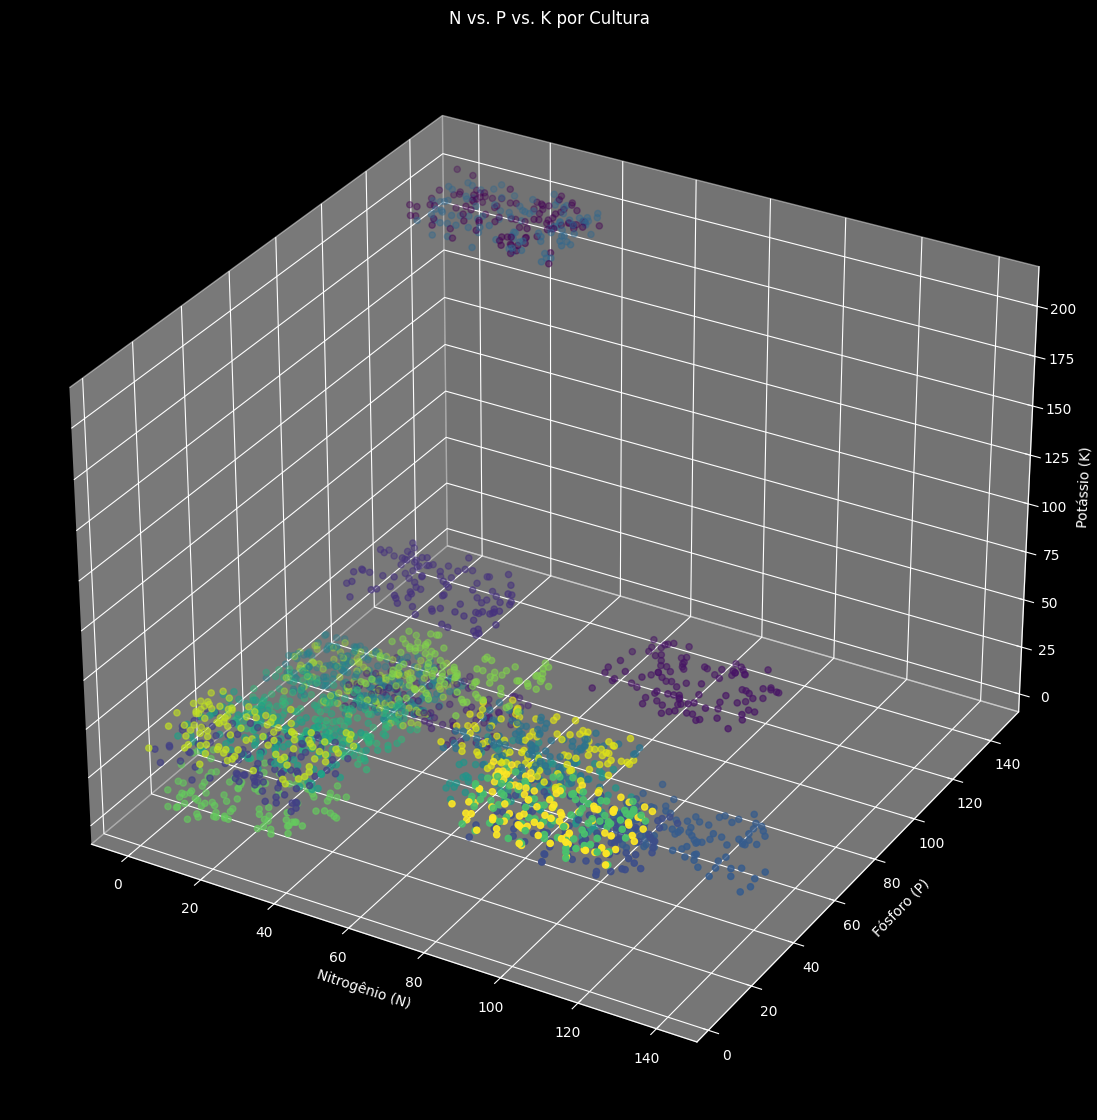

In [24]:
# Gráfico de dispersão 3D para N, P e K
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')

# Converter labels para números
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
labels = le.classes_

scatter = ax.scatter(df['N'], df['P'], df['K'], c=df['label_encoded'], cmap='viridis')
ax.set_title('N vs. P vs. K por Cultura')
ax.set_xlabel('Nitrogênio (N)')
ax.set_ylabel('Fósforo (P)')
ax.set_zlabel('Potássio (K)')

# Legenda personalizada
legend = ax.legend(handles=scatter.legend_elements()[0], labels=labels)
ax.add_artist(legend)

plt.show()

